Importing the libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Loading the data set

In [200]:
df=pd.read_csv('MBA_Placement_dataset.csv')

In [201]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Understanding the columns

In [202]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

1. sl_no – Serial number (unique identifier for each student).
2. gender – Gender of the student (e.g., male, female).
3. ssc_p – Secondary School Certificate percentage (10th grade).
4. ssc_b – Board of education for SSC (e.g., Central, Others).
5. hsc_p – Higher Secondary Certificate percentage (12th grade).
6. hsc_b – Board of education for HSC.
7. hsc_s – Specialization in HSC (e.g., Science, Commerce, Arts).
8. degree_p – Percentage in degree (e.g., B.Tech, B.Com).
10. degree_t – Type of degree (e.g., Sci&Tech, Comm&Mgmt, Others).
11. workex – Work experience (Yes/No).
12. etest_p – E-test (employability test) percentage.
13. specialisation – MBA specialisation (e.g., Mkt&Fin, Mkt&HR).
14. mba_p – MBA percentage.
15. status – Placement status (Placed/Not Placed).
16. salary – Salary offered (only for placed students).

get the information of columns and note the observation

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [204]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

missing data: only salary column has null values

In [205]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


                                                 DATA CLEANING                                                                             

1.check and remove the duplicates

In [206]:
df.duplicated().any()

np.False_

Observation:

no duplicate values

2. Handle the missing values

In [207]:
df=df.fillna(0)

In [208]:
# df.info()

                                          DATA TRANSFORMATION                                                                              

1.Renaming the column

In [209]:
df=df.rename(columns={'sl_no':'SL_No','gender':'Gender','status':'Placement_status','ssc_p':'SSLC_%','ssc_b':'SSLC_Board','hsc_p':'PU_%','hsc_b':'PU_Board','hsc_s':'PU_Specialization','degree_p':'Degree_%','degree_t':'Degree_stream','workex':'Work_Exp','etest_p':'placement_test_%','mba_p':'MBA_%','salary':'Salary','specialisation':'Specialisation_in_MBA'})
df.head(2)

,SL_No,Gender,SSLC_%,SSLC_Board,PU_%,PU_Board,PU_Specialization,Degree_%,Degree_stream,Work_Exp,placement_test_%,Specialisation_in_MBA,MBA_%,Placement_status,Salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


2.Creating new columns

In [210]:
bins = [0,36,50,60,75,100]
labels = ['Fail','Pass','Second Class','First Class','Distinction']

df['SSLC_Grade']=pd.cut(df['SSLC_%'],bins=bins,labels=labels)
df['PU_Grade']=pd.cut(df['PU_%'],bins=bins,labels=labels)
df['Degree_Grade']=pd.cut(df['Degree_%'],bins=bins,labels=labels)
df['MBA_Grade']=pd.cut(df['MBA_%'],bins=bins,labels=labels)
df.head()

,SL_No,Gender,SSLC_%,SSLC_Board,PU_%,PU_Board,PU_Specialization,Degree_%,Degree_stream,Work_Exp,placement_test_%,Specialisation_in_MBA,MBA_%,Placement_status,Salary,SSLC_Grade,PU_Grade,Degree_Grade,MBA_Grade
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,First Class,Distinction,Second Class,Second Class
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,Distinction,Distinction,Distinction,First Class
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,First Class,First Class,First Class,Second Class
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,Second Class,Second Class,Second Class,Second Class
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,Distinction,First Class,First Class,Second Class


In [211]:
bins = [0,50,60,75,100]
labels = ['Below Average','Average','Good','Excellent']
df['placement_test_grade'] = pd.cut(df['placement_test_%'], bins=bins,labels=labels)


3.Replacing the values

In [212]:
df['Placement_status']=df['Placement_status'].replace({'Placed':1,'Not Placed':0})
df['Work_Exp']=df['Work_Exp'].replace({'No':0,'Yes':1})
df['Gender']=df['Gender'].replace({'M':'Male','F':'Female'})
df.head()

C:\Users\Divya Gowda\AppData\Local\Temp\ipykernel_23516\312697661.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Placement_status']=df['Placement_status'].replace({'Placed':1,'Not Placed':0})
C:\Users\Divya Gowda\AppData\Local\Temp\ipykernel_23516\312697661.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Work_Exp']=df['Work_Exp'].replace({'No':0,'Yes':1})


,SL_No,Gender,SSLC_%,SSLC_Board,PU_%,PU_Board,PU_Specialization,Degree_%,Degree_stream,Work_Exp,placement_test_%,Specialisation_in_MBA,MBA_%,Placement_status,Salary,SSLC_Grade,PU_Grade,Degree_Grade,MBA_Grade,placement_test_grade
0,1,Male,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0,First Class,Distinction,Second Class,Second Class,Average
1,2,Male,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0,Distinction,Distinction,Distinction,First Class,Excellent
2,3,Male,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0,First Class,First Class,First Class,Second Class,Good
3,4,Male,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0,Second Class,Second Class,Second Class,Second Class,Good
4,5,Male,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0,Distinction,First Class,First Class,Second Class,Excellent


4.Rearranging the columns

In [213]:
df = df[['SL_No', 'Gender', 'SSLC_%','SSLC_Grade','SSLC_Board','PU_Specialization','PU_%','PU_Grade','PU_Board','Degree_stream','Degree_%','Degree_Grade','Specialisation_in_MBA','MBA_%','MBA_Grade','placement_test_%','placement_test_grade','Placement_status','Work_Exp','Salary']]

                                             ANALYSIS                                                                                                              

1.what is the gender distribution of students?

In [214]:
df['Gender'].value_counts()

Gender
Male      139
Female     76
Name: count, dtype: int64

2.Count of placed students and not placed students

In [215]:
df['Placement_status'].value_counts()

Placement_status
1    148
0     67
Name: count, dtype: int64

3.What is the overall placement rate across all students?

In [216]:
df['Placement_status'].mean().round(3)

np.float64(0.688)

4.What is the placement rate by gender ?

In [217]:
df.groupby(['Gender'])['Placement_status'].mean().round(2)

Gender
Female    0.63
Male      0.72
Name: Placement_status, dtype: float64

5.Is there a significant difference in academic performance between genders?

In [218]:
df.groupby(['Gender'])[['SSLC_%','PU_%','Degree_%','MBA_%']].mean()

,SSLC_%,PU_%,Degree_%,MBA_%
Gender,,,,
Female,68.310921,66.646842,68.090000,64.643553
Male,66.752518,66.161655,65.429856,60.984892


 6.What is the placement rate by Degree grade?

In [219]:
df.groupby(['Degree_Grade'],observed=False)['Placement_status'].mean().round(2)

Degree_Grade
Fail             NaN
Pass            0.00
Second Class    0.32
First Class     0.77
Distinction     0.92
Name: Placement_status, dtype: float64

7.What is the average salary and placment rate for each placement_test_grade ?

In [220]:
df.groupby(['placement_test_grade'],observed=True)[['Salary','Placement_status']].mean().round(2)

,Salary,Placement_status
placement_test_grade,,
Below Average,88333.33,0.33
Average,181107.14,0.66
Good,178810.81,0.65
Excellent,232707.32,0.76


8.Which PU grade group has the highest placement rate?

In [221]:
df.groupby(['PU_Grade'],observed=True)['Placement_status'].mean().round(2)

PU_Grade
Pass            0.00
Second Class    0.51
First Class     0.75
Distinction     0.92
Name: Placement_status, dtype: float64

9.What is the placement rate by degree type 

In [222]:
df.groupby(['Degree_stream'])['Placement_status'].mean().round(2)

Degree_stream
Comm&Mgmt    0.70
Others       0.45
Sci&Tech     0.69
Name: Placement_status, dtype: float64

10.Does prior work experience affect placement rate and salary?

In [223]:
df.groupby('Work_Exp')[['Placement_status', 'Salary']].mean()


,Placement_status,Salary
Work_Exp,,
0,0.595745,165333.333333
1,0.864865,262283.783784


                                              ANALYSIS USING PLOTS                                                                         

1.count of students in each SSLC grade 

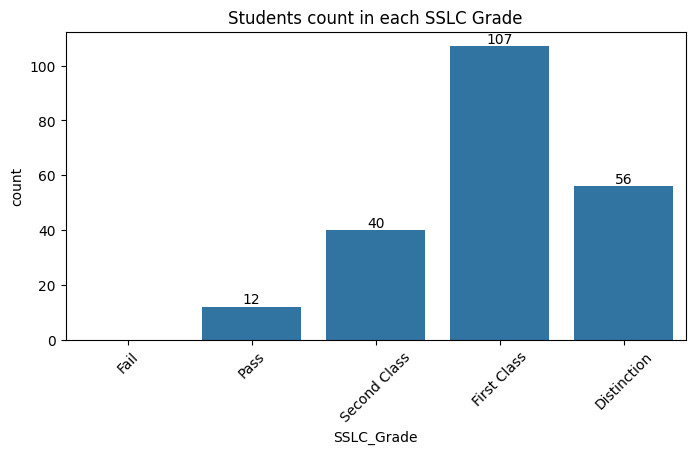

In [224]:
plt.figure(figsize=(8,4))
a=sns.countplot(data=df,x='SSLC_Grade')
a.bar_label(a.containers[0])
plt.title('Students count in each SSLC Grade')
plt.xticks(rotation=45)
plt.show()

Observation:

--> There are more people who got first class and also no one failed.

2.In which PU board ,more number of students have completed their PU

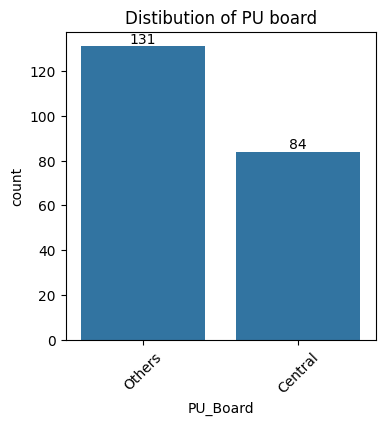

In [225]:
plt.figure(figsize=(4,4))
a=sns.countplot(data=df,x='PU_Board')
a.bar_label(a.containers[0])
plt.title('Distibution of PU board')
plt.xticks(rotation=45)
plt.show()

Observation:

--> More number of students have completed their pu which belongs to others board.

3.Correlation between MBA Percenatge and Salary?

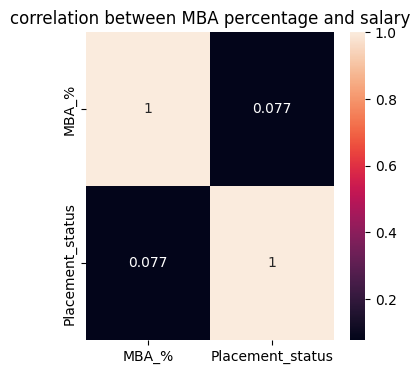

In [226]:
c= df[['MBA_%', 'Placement_status']].corr()
plt.figure(figsize=(4,4))
sns.heatmap(c,annot=True)
plt.title('correlation between MBA percentage and salary')
plt.show()

Observation:

--> The correlation coefficient between MBA percentage and placement status is 0.077.

--> This indicates a 'very weak positive correlation' between the two variables.

--> In simple terms, MBA percentage has very little influence on whether a student gets placed or not.

--> The value is close to 0, suggesting that academic performance in MBA does not strongly affect placement status.

4.How are students distributed across placement test performance categories ?

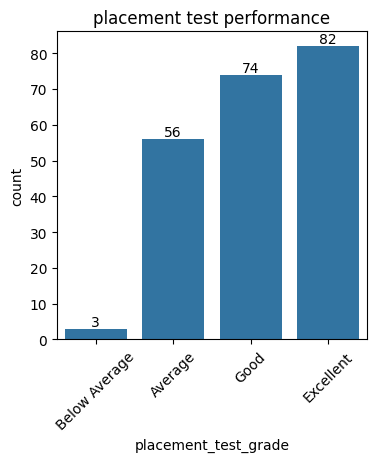

In [227]:
plt.figure(figsize=(4,4))
a=sns.countplot(data=df,x='placement_test_grade')
a.bar_label(a.containers[0])
plt.title('placement test performance')
plt.xticks(rotation=45)
plt.show()

Observation:

-->  Almost more people have scored excellent marks in placement test.

5.Compare the count of students from each specialisation across the placement test grade.

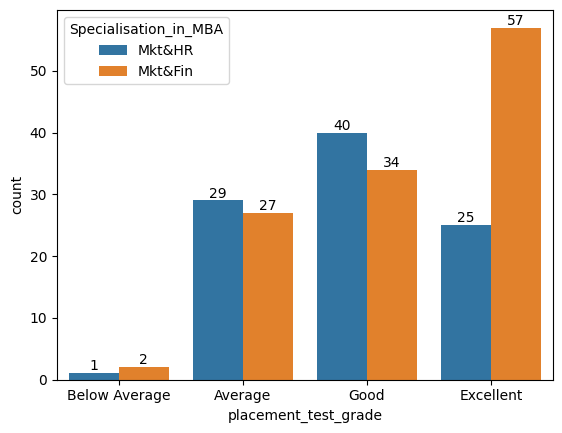

In [228]:
a=sns.countplot(data=df,x='placement_test_grade',hue='Specialisation_in_MBA')
for i in a.containers:
    a.bar_label(i)

Observation:

--> The more people with MKT&Fin specialization have excellent performance in placement test.

In [229]:
df.head()

,SL_No,Gender,SSLC_%,SSLC_Grade,SSLC_Board,PU_Specialization,PU_%,PU_Grade,PU_Board,Degree_stream,Degree_%,Degree_Grade,Specialisation_in_MBA,MBA_%,MBA_Grade,placement_test_%,placement_test_grade,Placement_status,Work_Exp,Salary
0,1,Male,67.00,First Class,Others,Commerce,91.00,Distinction,Others,Sci&Tech,58.00,Second Class,Mkt&HR,58.80,Second Class,55.0,Average,1,0,270000.0
1,2,Male,79.33,Distinction,Central,Science,78.33,Distinction,Others,Sci&Tech,77.48,Distinction,Mkt&Fin,66.28,First Class,86.5,Excellent,1,1,200000.0
2,3,Male,65.00,First Class,Central,Arts,68.00,First Class,Central,Comm&Mgmt,64.00,First Class,Mkt&Fin,57.80,Second Class,75.0,Good,1,0,250000.0
3,4,Male,56.00,Second Class,Central,Science,52.00,Second Class,Central,Sci&Tech,52.00,Second Class,Mkt&HR,59.43,Second Class,66.0,Good,0,0,0.0
4,5,Male,85.80,Distinction,Central,Commerce,73.60,First Class,Central,Comm&Mgmt,73.30,First Class,Mkt&Fin,55.50,Second Class,96.8,Excellent,1,0,425000.0


6. How does the Employability Test score  vary with academic performance across different education levels (SSLC,PU, Degree, MBA)?

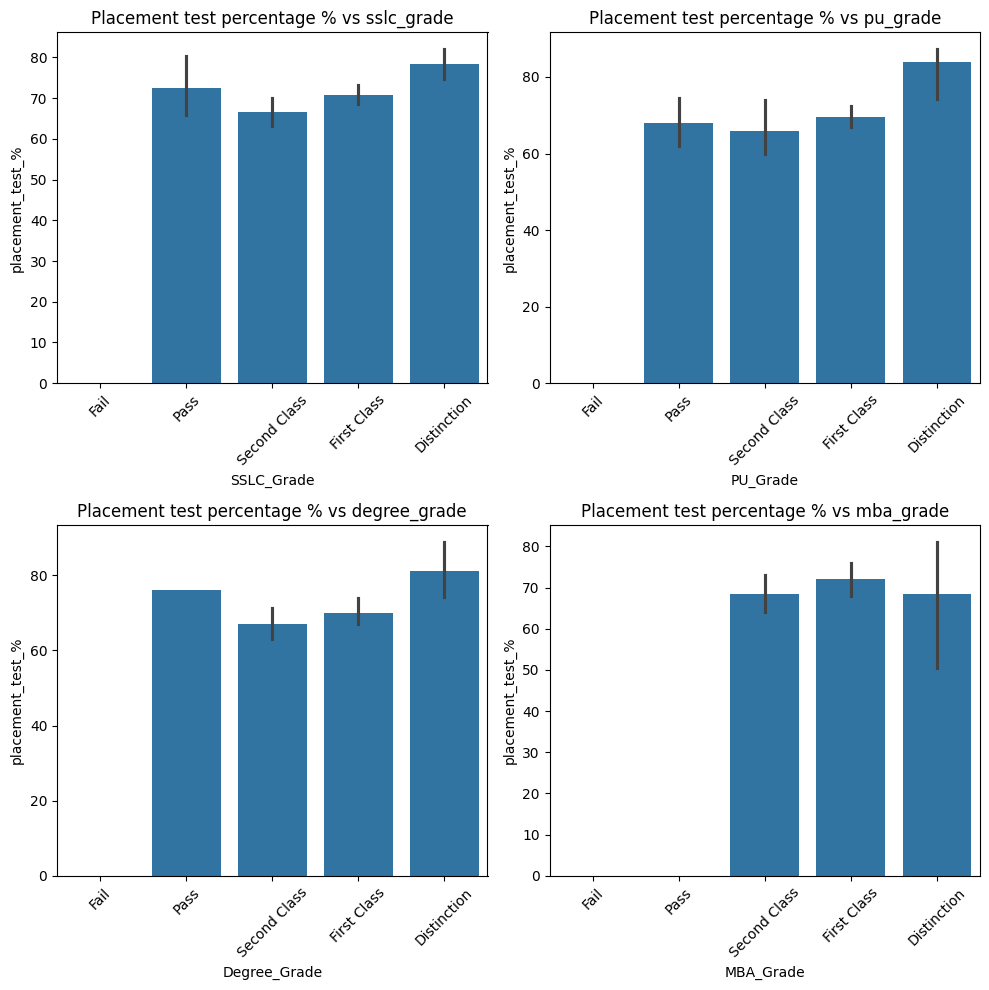

In [230]:

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Placement test percentage % vs sslc_grade')
sns.barplot(data=df,x='SSLC_Grade',y='placement_test_%')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.title('Placement test percentage % vs pu_grade')
sns.barplot(data=df,x='PU_Grade',y='placement_test_%',estimator='median')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.title('Placement test percentage % vs degree_grade')
sns.barplot(data=df,x='Degree_Grade',y='placement_test_%',estimator='median')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
plt.title('Placement test percentage % vs mba_grade')
sns.barplot(data=df,x='MBA_Grade',y='placement_test_%',estimator='median')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Observation:

--> SSLC Grade vs Placement Test %: Students with Distinction and Pass in SSLC tend to score higher on the placement test than others.

--> PU Grade vs Placement Test %: Distinction holders perform the best, while Pass and Second Class students score lower.

--> Degree Grade vs Placement Test %: Placement scores are highest for Distinction students, followed by Pass.

--> MBA Grade vs Placement Test %: Surprisingly, Second Class and First Class MBA students perform slightly better than those with Distinction,reason may be have focused heavily on academics and theory,

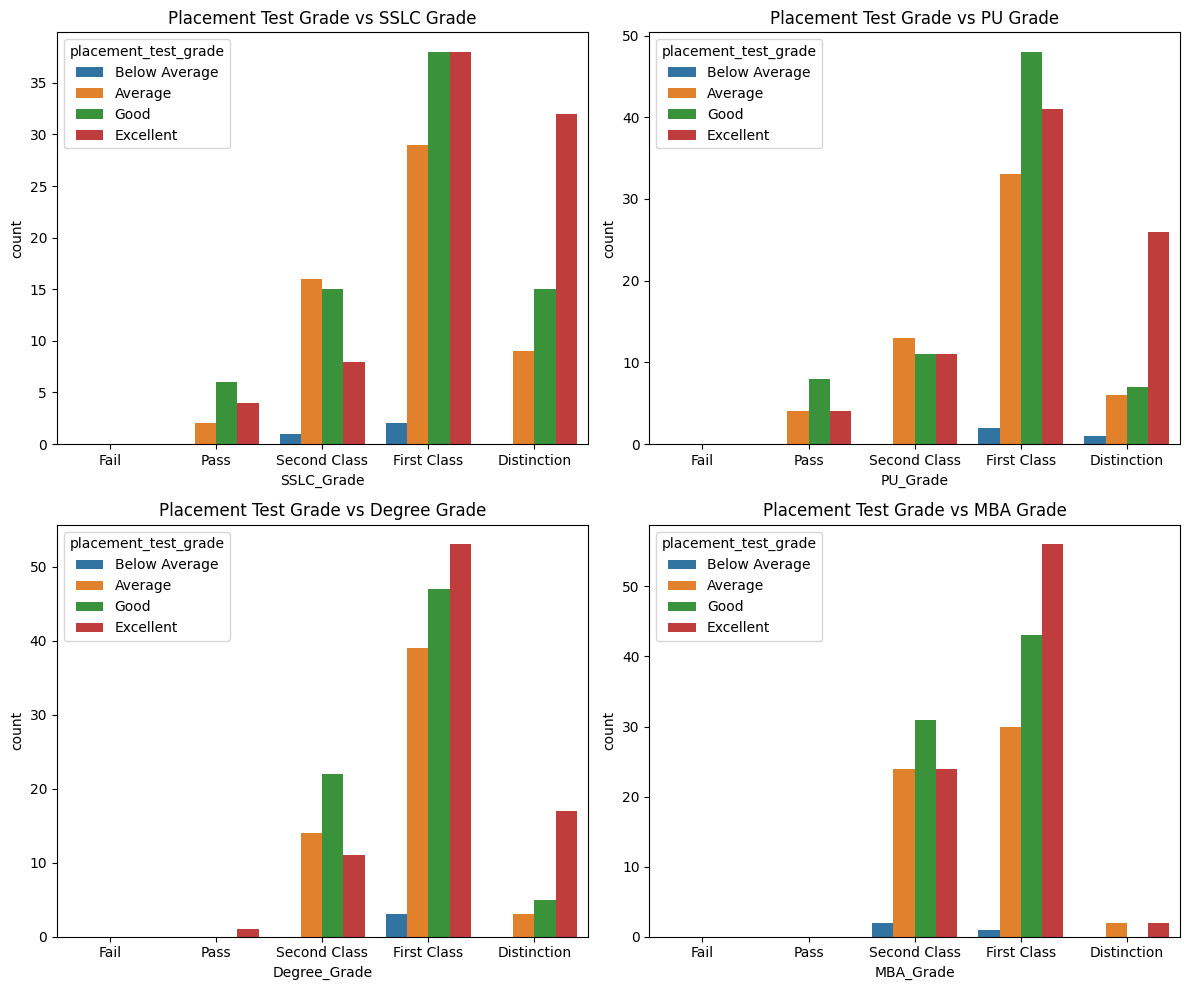

In [231]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x="SSLC_Grade", hue="placement_test_grade", data=df, ax=axes[0,0])
axes[0,0].set_title("Placement Test Grade vs SSLC Grade")

sns.countplot(x="PU_Grade", hue="placement_test_grade", data=df, ax=axes[0,1])
axes[0,1].set_title("Placement Test Grade vs PU Grade")

sns.countplot(x="Degree_Grade", hue="placement_test_grade", data=df, ax=axes[1,0])
axes[1,0].set_title("Placement Test Grade vs Degree Grade")

sns.countplot(x="MBA_Grade", hue="placement_test_grade", data=df, ax=axes[1,1])
axes[1,1].set_title("Placement Test Grade vs MBA Grade")

plt.tight_layout()
plt.show()

Observation:

plot-1:

--> Students with First Class and Distinction mostly scored Excellent or Good in the placement test.

--> Very few from Pass or Fail scored well.

plot-2:

--> First Class students dominate the Good and Excellent placement grades.

--> Second Class has more Average scores.

--> Distinction is also associated with high placement grades.

plot-3:

--> First Class clearly shows the highest number of Excellent placements.

--> Very few Distinction or Pass students scored high in the placement test.

plot-4:

--> First Class MBA students strongly correlate with Excellent placement grades.

--> Distinction and lower grades have very few students and fewer high scores.

                                                        Final Analysis                                                                     

Observation:

-->Out of 215 students, 148 got placed

-->Female students had a slightly higher placement rate (70% placed)

-->Placed students had better scores in SSLC, PU, Degree, and MBA

-->Good academic performance increases placement chances

-->Students with work experience had more placements and earned better salaries

--> Marketing & Finance specialization had better placement results than other streams

-->Students with highest salaries had: Strong academic background, Prior work experience, High employability test scores

-->Placement test scores are strongly linked to better placements and higher salaries

-->Success in placement and salary depends on:
Good academics, Work experience, High test scores, Right specialization